**Import necessary python libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Setup basic training parameters

In [153]:
training_epochs = 3600
num_examples = 5000
test_fraction = 0.75

np.random.seed(1000)

Create a 11-hidden layers MLP

*Try use different number of layers

In [149]:
model = Sequential()

neurons = 50

model.add(Dense(1, input_dim=1, activation='tanh', kernel_initializer='random_normal'))



model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))




model.add(Dense(1, activation='tanh', kernel_initializer='random_normal'))

Testing function

>$y=A\times sin(2\times \pi \times t^2)$

In [ ]:
def f(x):
  return np.sin(2*np.pi*x**2 )+ 0.1*np.random.randn(x.shape[0])

Raw data generation (with noise)

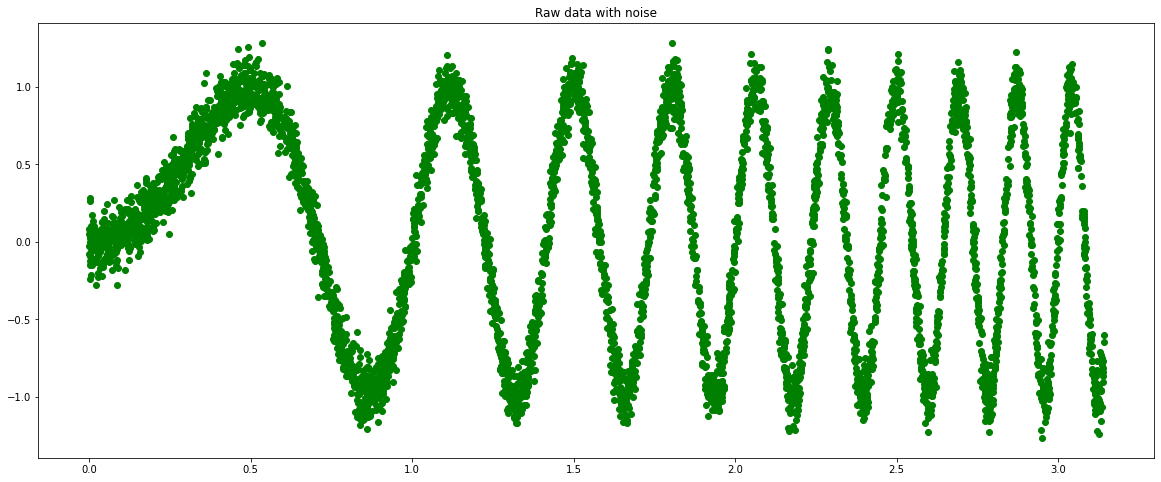

In [ ]:
#np.random.unitorm(low,high,size)
all_x = np.random.uniform(0*np.pi, np.pi, num_examples).T
fig = plt.figure(figsize=(20,8))
plt.title('Raw data with noise')
plt.scatter(all_x, f(all_x), color='g')

Prepare training and testing dataset

In [ ]:
np.random.shuffle(all_x)
train_size = int(num_examples*test_fraction)

# Partition data
x_training = all_x[:train_size]
x_testing = all_x[train_size:]
y_training = f(x_training)
y_testing = f(x_testing)

Plot the testing and training data

<Figure size 432x288 with 0 Axes>

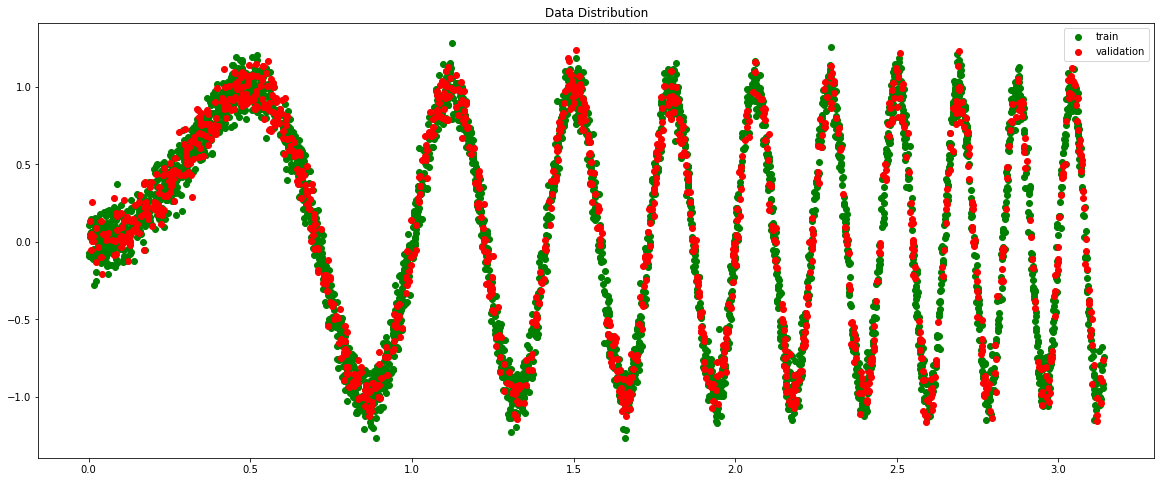

In [ ]:
plt.figure(1)
fig = plt.figure(figsize=(20,8))
plt.title('Data Distribution')
plt.scatter(x_training, y_training, c='green', label='train')
plt.scatter(x_testing, y_testing, c='red', label='validation')
plt.legend()

Starts training

In [154]:
loss_function = tf.keras.losses.MeanSquaredError()

model.compile(loss=loss_function, optimizer='adam')



Fitting the data to the training data sets

Streaming output truncated to the last 5000 lines.
4/4 - 0s - loss: 0.0147
Epoch 1104/3600
4/4 - 0s - loss: 0.0131
Epoch 1105/3600
4/4 - 0s - loss: 0.0137
Epoch 1106/3600
4/4 - 0s - loss: 0.0134
Epoch 1107/3600
4/4 - 0s - loss: 0.0149
Epoch 1108/3600
4/4 - 0s - loss: 0.0164
Epoch 1109/3600
4/4 - 0s - loss: 0.0160
Epoch 1110/3600
4/4 - 0s - loss: 0.0152
Epoch 1111/3600
4/4 - 0s - loss: 0.0149
Epoch 1112/3600
4/4 - 0s - loss: 0.0211
Epoch 1113/3600
4/4 - 0s - loss: 0.0161
Epoch 1114/3600
4/4 - 0s - loss: 0.0136
Epoch 1115/3600
4/4 - 0s - loss: 0.0128
Epoch 1116/3600
4/4 - 0s - loss: 0.0129
Epoch 1117/3600
4/4 - 0s - loss: 0.0138
Epoch 1118/3600
4/4 - 0s - loss: 0.0143
Epoch 1119/3600
4/4 - 0s - loss: 0.0137
Epoch 1120/3600
4/4 - 0s - loss: 0.0135
Epoch 1121/3600
4/4 - 0s - loss: 0.0155
Epoch 1122/3600
4/4 - 0s - loss: 0.0213
Epoch 1123/3600
4/4 - 0s - loss: 0.0190
Epoch 1124/3600
4/4 - 0s - loss: 0.0175
Epoch 1125/3600
4/4 - 0s - loss: 0.0152
Epoch 1126/3600
4/4 - 0s - loss: 0.0143
Epoch

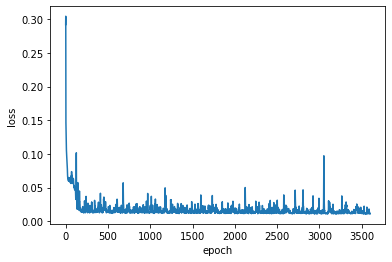

In [155]:
# fit the model on the training dataset
history = model.fit(x_training, y_training, epochs=training_epochs, batch_size=1000, verbose=2)

print()
print("History keys are following: ")
print(history.history.keys())
print()

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Test the result

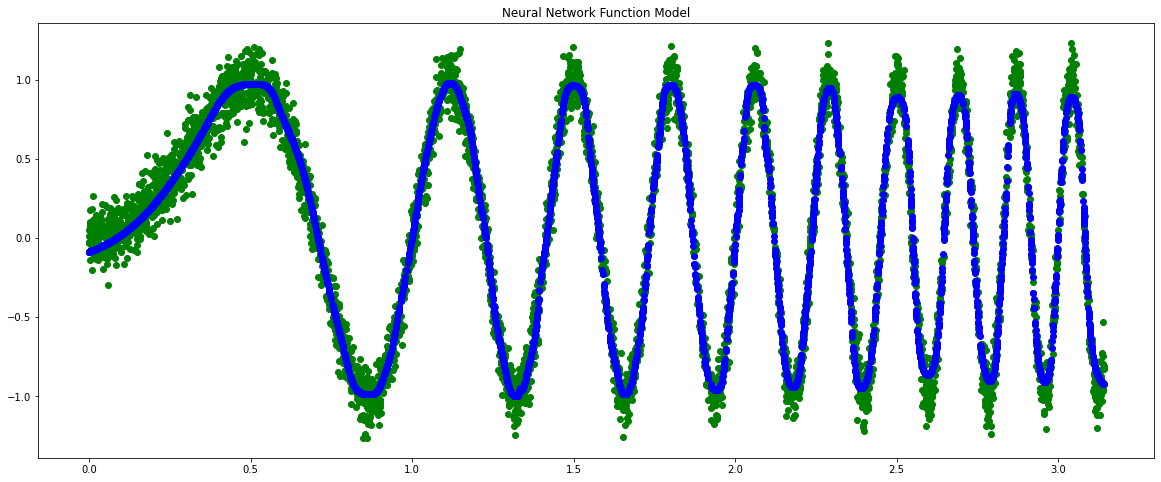

In [156]:
y_pred = model.predict(all_x)

fig = plt.figure(figsize=(20,8))
plt.title('Neural Network Function Model')
plt.scatter(all_x,f(all_x), color='g', label='Experimental Data')
plt.scatter(all_x,y_pred, color='b', label='AI Prediction')